In [1]:
import numpy as np
from numpy import linalg as la
from scipy import sparse
import pandas as pd
import seaborn as sns
import src.normFunction as nf
import src.cg as CG
import scipy.sparse as sparse
from src.utility import make_plot
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
PATH = "./matrix/"

In [4]:
M1 = np.loadtxt(PATH + 'M1.txt')
M2 = np.loadtxt(PATH + 'M2.txt')
M3 = np.loadtxt(PATH + 'M3.txt')
M4 = np.loadtxt(PATH + 'M4.txt')
M5 = np.loadtxt(PATH + 'M5.txt')

In [5]:
def make_plot(normsGradient_PR, normsGradient_HS, normsGradient_FR,
              relativeErrors_PR, relativeErrors_HS, relativeErrors_FR,
              type = 'M1', experiment_name='M'):
    
    font = {'family': 'DejaVu Sans',
            'weight': 'normal',
            'size': 20}
    plt.rc('font', **font)
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    axs[0].set_yscale('log')
    axs[1].set_yscale('log')
    
    # Title
    fig.suptitle(
            'Matrix Type  ' + type + ' Relative error and gradient norm')
    
    for i in range(len(relativeErrors_PR)):
        relativeErrors_PR[i] = [max(err, 1e-20) for err in relativeErrors_PR[i]]
    
        x = list(range(len(relativeErrors_PR[i])))
        axs[0].plot(x, relativeErrors_PR[i], label = "PR")
        axs[1].plot(x, normsGradient_PR[i], label = 'PR')
        
    #for i in range(len(relativeErrors_HS)):
    #    relativeErrors_HS[i] = [max(err, 1e-20) for err in relativeErrors_HS[i]]
    #
    #    x = list(range(len(relativeErrors_HS[i])))
    #    axs[0].plot(x, relativeErrors_HS[i], label = 'HS')
    #    axs[1].plot(x, normsGradient_HS[i], label = 'HS')
        
    for i in range(len(relativeErrors_FR)):
        relativeErrors_FR[i] = [max(err, 1e-20) for err in relativeErrors_FR[i]]
    
        x = list(range(len(relativeErrors_FR[i])))
        axs[0].plot(x, relativeErrors_FR[i], label = 'FR')
        axs[1].plot(x, normsGradient_FR[i], label = 'FR')
        
    axs[0].legend()
    axs[1].legend()
    axs[1].set_xlabel("Iterations")
    axs[1].set_ylabel("Norm")
    axs[0].set_xlabel("Iterations")
    axs[0].set_ylabel("Relative Error")
    
    plot_path = 'plot/'
    plt.savefig(plot_path + experiment_name + '.png')

# Experiments on Matrix M1

In [104]:
errorsCG_PR = []
gradientsCG_PR = []
errorsCG_FR = []
gradientsCG_FR = []
errorsCG_HS = []
gradientsCG_HS = []

In [105]:
f = nf.normFunction(M1)

In [106]:
initial_vector = f.init_x()

In [107]:
norm = la.norm(M1, ord=2) ** 2

PR beta

In [108]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [109]:
normsCG_PR = np.array(normsCG)
gradientsCG_PR.insert(0,np.array(gradientCG))
size1 = normsCG_PR.size

In [110]:
normvec = np.ones(size1) * norm
errorsCG_PR.insert(0, (abs(normsCG_PR - normvec) / abs(normvec)))

HS beta

In [111]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='HS', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [112]:
normsCG_HS = np.array(normsCG)
gradientsCG_HS.insert(0,np.array(gradientCG))
size1 = normsCG_HS.size

In [113]:
normvec = np.ones(size1) * norm
errorsCG_HS.insert(0, (abs(normsCG_HS - normvec) / abs(normvec)))

FR beta

In [114]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='FR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [115]:
normsCG_FR = np.array(normsCG)
gradientsCG_FR.insert(0,np.array(gradientCG))
size1 = normsCG_FR.size

In [116]:
normvec = np.ones(size1) * norm
errorsCG_FR.insert(0, (abs(normsCG_FR - normvec) / abs(normvec)))

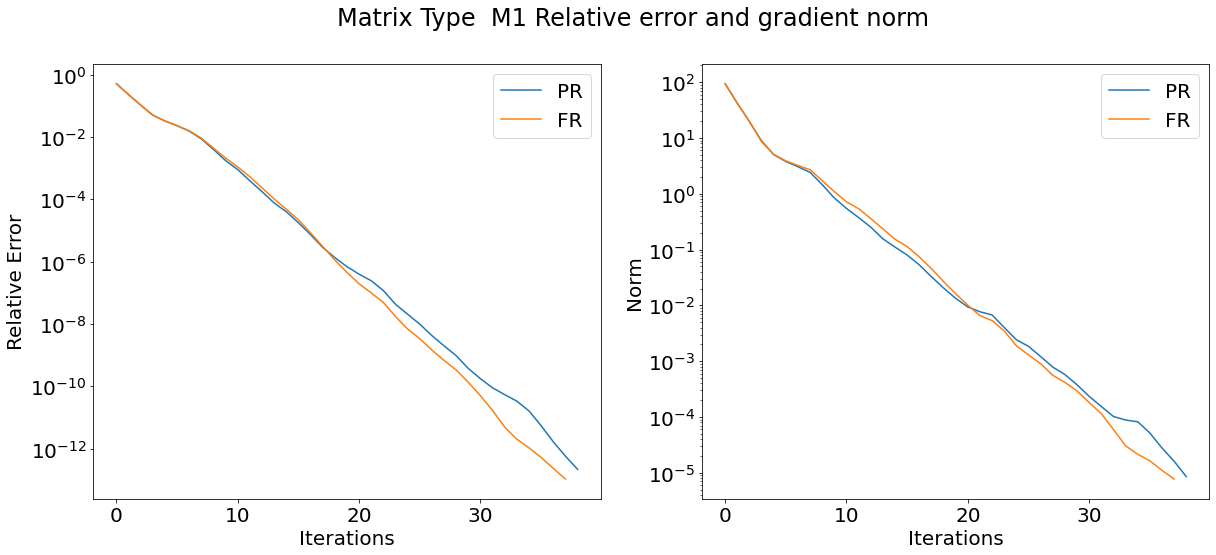

In [117]:
make_plot(gradientsCG_PR, gradientsCG_HS, gradientsCG_FR,
              errorsCG_PR, errorsCG_HS, errorsCG_FR,
              type = 'M1', experiment_name='CG-M1')

# Experiments on Matrix M1 With gradient descent

In [172]:
import src.gd as GD

In [173]:
def make_plot(normsGradient_PR, normsGradient_GD, normsGradient_FR,
              relativeErrors_PR, relativeErrors_GD, relativeErrors_FR,
              type = 'M1', experiment_name='M'):
    
    font = {'family': 'DejaVu Sans',
            'weight': 'normal',
            'size': 20}
    plt.rc('font', **font)
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    axs[0].set_yscale('log')
    axs[1].set_yscale('log')
    
    # Title
    fig.suptitle(
            'Matrix Type  ' + type + ' Relative error and gradient norm')
    
    for i in range(len(relativeErrors_PR)):
        relativeErrors_PR[i] = [max(err, 1e-20) for err in relativeErrors_PR[i]]
    
        x = list(range(len(relativeErrors_PR[i])))
        axs[0].plot(x, relativeErrors_PR[i], label = "PR")
        axs[1].plot(x, normsGradient_PR[i], label = 'PR')
        
    for i in range(len(relativeErrors_GD)):
        relativeErrors_GD[i] = [max(err, 1e-20) for err in relativeErrors_GD[i]]
    
        x = list(range(len(relativeErrors_GD[i])))
        axs[0].plot(x, relativeErrors_GD[i], label = 'GD')
        axs[1].plot(x, normsGradient_GD[i], label = 'GD')
        
    for i in range(len(relativeErrors_FR)):
        relativeErrors_FR[i] = [max(err, 1e-20) for err in relativeErrors_FR[i]]
    
        x = list(range(len(relativeErrors_FR[i])))
        axs[0].plot(x, relativeErrors_FR[i], label = 'FR')
        axs[1].plot(x, normsGradient_FR[i], label = 'FR')
        
    axs[0].legend()
    axs[1].legend()
    axs[1].set_xlabel("Iterations")
    axs[1].set_ylabel("Norm")
    axs[0].set_xlabel("Iterations")
    axs[0].set_ylabel("Relative Error")
    
    plot_path = 'plot/'
    plt.savefig(plot_path + experiment_name + '.png')

In [174]:
errorsCG_PR = []
gradientsCG_PR = []
errorsCG_FR = []
gradientsCG_FR = []
errorsSGD = []
gradientsSGD = []

In [175]:
f = nf.normFunction(M1)
initial_vector = f.init_x()
norm = la.norm(M1, ord=2) ** 2

PR beta

In [176]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [177]:
normsCG_PR = np.array(normsCG)
gradientsCG_PR.insert(0,np.array(gradientCG))
size1 = normsCG_PR.size

In [178]:
normvec = np.ones(size1) * norm
errorsCG_PR.insert(0, (abs(normsCG_PR - normvec) / abs(normvec)))

FR beta

In [179]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='FR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [180]:
normsCG_FR = np.array(normsCG)
gradientsCG_FR.insert(0,np.array(gradientCG))
size1 = normsCG_FR.size

In [181]:
normvec = np.ones(size1) * norm
errorsCG_FR.insert(0, (abs(normsCG_FR - normvec) / abs(normvec)))

gradient descent

In [182]:
optimizerSGD = GD.steepestGradientDescent(f, 1e-5, 500, fstar = norm, x=initial_vector, verbose = True)
gradientSGD, normsSGD = optimizerSGD.steepestGradientDescent()

Iteration 1, f(x) = 497.7357, Norm of the gradient = 79.825959 
Iteration 2, f(x) = 786.9255, Norm of the gradient = 34.148682 
Iteration 3, f(x) = 892.2850, Norm of the gradient = 26.128802 
Iteration 4, f(x) = 940.9341, Norm of the gradient = 15.897033 
Iteration 5, f(x) = 964.3089, Norm of the gradient = 12.712159 
Iteration 6, f(x) = 977.4291, Norm of the gradient = 9.502948 
Iteration 7, f(x) = 986.6780, Norm of the gradient = 9.056821 
Iteration 8, f(x) = 993.6220, Norm of the gradient = 7.149565 
Iteration 9, f(x) = 998.8922, Norm of the gradient = 6.800108 
Iteration 10, f(x) = 1002.8147, Norm of the gradient = 5.282500 
Iteration 11, f(x) = 1005.6797, Norm of the gradient = 4.936517 
Iteration 12, f(x) = 1007.7459, Norm of the gradient = 3.799120 
Iteration 13, f(x) = 1009.2248, Norm of the gradient = 3.528745 
Iteration 14, f(x) = 1010.2812, Norm of the gradient = 2.715936 
Iteration 15, f(x) = 1011.0374, Norm of the gradient = 2.529787 
Iteration 16, f(x) = 1011.5812, Norm o

In [183]:
normsSGD = np.array(normsSGD)
gradientsSGD.insert(0,np.array(gradientSGD))
size1 = normsSGD.size

In [184]:
normvec = np.ones(size1) * norm
errorsSGD.insert(0, (abs(normsSGD - normvec) / abs(normvec)))

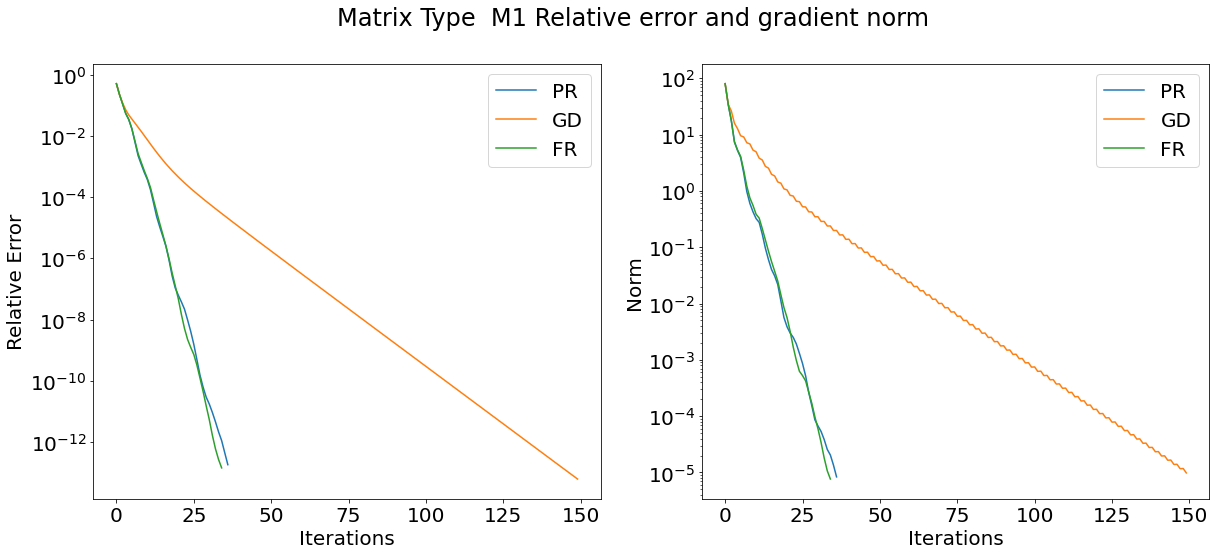

In [185]:
make_plot(gradientsCG_PR, gradientsSGD, gradientsCG_FR,
              errorsCG_PR, errorsSGD, errorsCG_FR,
              type = 'M1', experiment_name='CG-GD-M1')

# Experiments on Matrix M2

In [118]:
errorsCG_PR = []
gradientsCG_PR = []
errorsCG_FR = []
gradientsCG_FR = []
errorsCG_HS = []
gradientsCG_HS = []

In [119]:
f = nf.normFunction(M2)

In [120]:
initial_vector = f.init_x()

In [121]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [122]:
norm = la.norm(M2, ord=2) ** 2

PR beta

In [123]:
normsCG_PR = np.array(normsCG)
gradientsCG_PR.insert(0,np.array(gradientCG))
size1 = normsCG_PR.size

In [124]:
normvec = np.ones(size1) * norm
errorsCG_PR.insert(0, (abs(normsCG_PR - normvec) / abs(normvec)))

HS beta

In [125]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='HS', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [126]:
normsCG_HS = np.array(normsCG)
gradientsCG_HS.insert(0,np.array(gradientCG))
size1 = normsCG_HS.size

In [127]:
normvec = np.ones(size1) * norm
errorsCG_HS.insert(0, (abs(normsCG_HS - normvec) / abs(normvec)))

FR beta

In [128]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='FR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [129]:
normsCG_FR = np.array(normsCG)
gradientsCG_FR.insert(0,np.array(gradientCG))
size1 = normsCG_FR.size

In [130]:
normvec = np.ones(size1) * norm
errorsCG_FR.insert(0, (abs(normsCG_FR - normvec) / abs(normvec)))

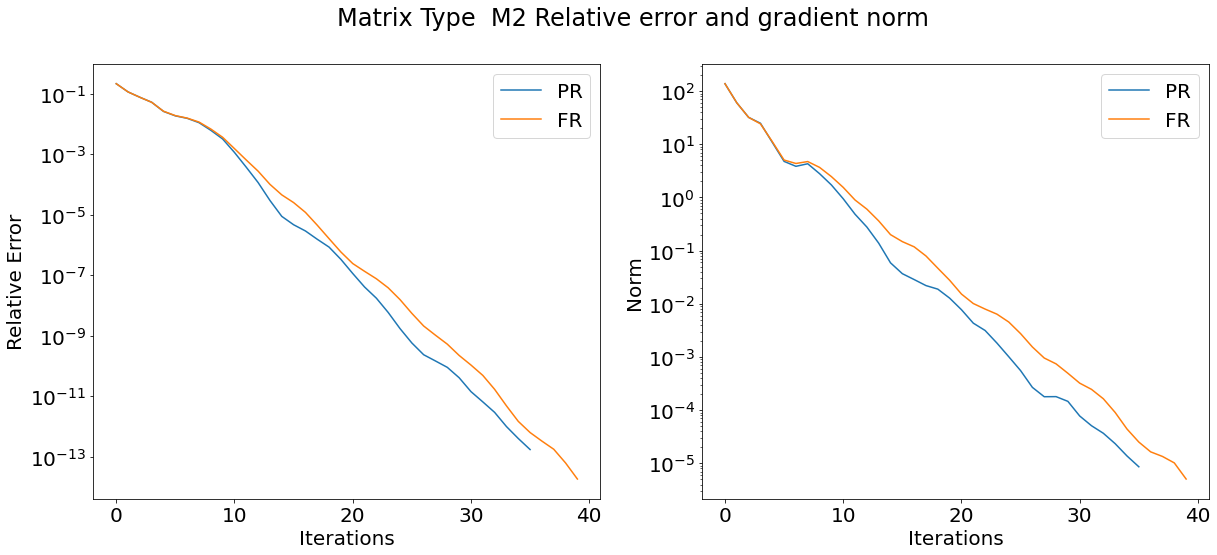

In [131]:
make_plot(gradientsCG_PR,gradientsCG_HS, gradientsCG_FR,
              errorsCG_PR, errorsCG_HS, errorsCG_FR,
              type = 'M2', experiment_name='CG-M2')

# Experiments on Matrix M3

In [34]:
errorsCG_PR = []
gradientsCG_PR = []
errorsCG_FR = []
gradientsCG_FR = []
errorsCG_HS = []
gradientsCG_HS = []

In [35]:
f = nf.normFunction(M3)

In [36]:
initial_vector = f.init_x()

In [37]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [38]:
norm = la.norm(M3, ord=2) ** 2

PR beta

In [39]:
normsCG_PR = np.array(normsCG)
gradientsCG_PR.insert(0,np.array(gradientCG))
size1 = normsCG_PR.size

In [40]:
normvec = np.ones(size1) * norm
errorsCG_PR.insert(0, (abs(normsCG_PR - normvec) / abs(normvec)))

HS beta

In [41]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='HS', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [42]:
normsCG_HS = np.array(normsCG)
gradientsCG_HS.insert(0,np.array(gradientCG))
size1 = normsCG_HS.size

In [43]:
normvec = np.ones(size1) * norm
errorsCG_HS.insert(0, (abs(normsCG_HS - normvec) / abs(normvec)))

FR beta

In [44]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='FR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [45]:
normsCG_FR = np.array(normsCG)
gradientsCG_FR.insert(0,np.array(gradientCG))
size1 = normsCG_FR.size

In [46]:
normvec = np.ones(size1) * norm
errorsCG_FR.insert(0, (abs(normsCG_FR - normvec) / abs(normvec)))

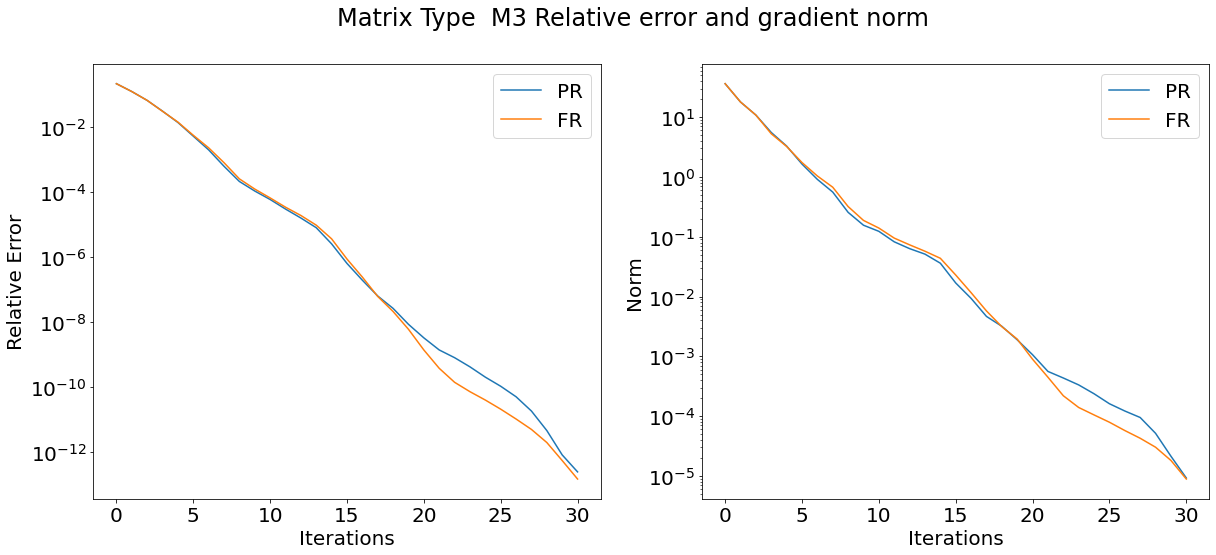

In [47]:
make_plot(gradientsCG_PR,gradientsCG_HS, gradientsCG_FR,
              errorsCG_PR, errorsCG_HS, errorsCG_FR,
              type = 'M3', experiment_name='CG-M3')

# Experiments on Matrix M4

In [146]:
errorsCG_PR = []
gradientsCG_PR = []
errorsCG_FR = []
gradientsCG_FR = []
errorsCG_HS = []
gradientsCG_HS = []

In [147]:
f = nf.normFunction(M4)

In [148]:
initial_vector = f.init_x()

In [149]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [150]:
norm = la.norm(M4, ord=2) ** 2

PR beta

In [151]:
normsCG_PR = np.array(normsCG)
gradientsCG_PR.insert(0,np.array(gradientCG))
size1 = normsCG_PR.size

In [152]:
normvec = np.ones(size1) * norm
errorsCG_PR.insert(0, (abs(normsCG_PR - normvec) / abs(normvec)))

HS beta

In [153]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='HS', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [154]:
normsCG_HS = np.array(normsCG)
gradientsCG_HS.insert(0,np.array(gradientCG))
size1 = normsCG_HS.size

In [155]:
normvec = np.ones(size1) * norm
errorsCG_HS.insert(0, (abs(normsCG_HS - normvec) / abs(normvec)))

FR beta

In [156]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='FR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [157]:
normsCG_FR = np.array(normsCG)
gradientsCG_FR.insert(0,np.array(gradientCG))
size1 = normsCG_FR.size

In [158]:
normvec = np.ones(size1) * norm
errorsCG_FR.insert(0, (abs(normsCG_FR - normvec) / abs(normvec)))

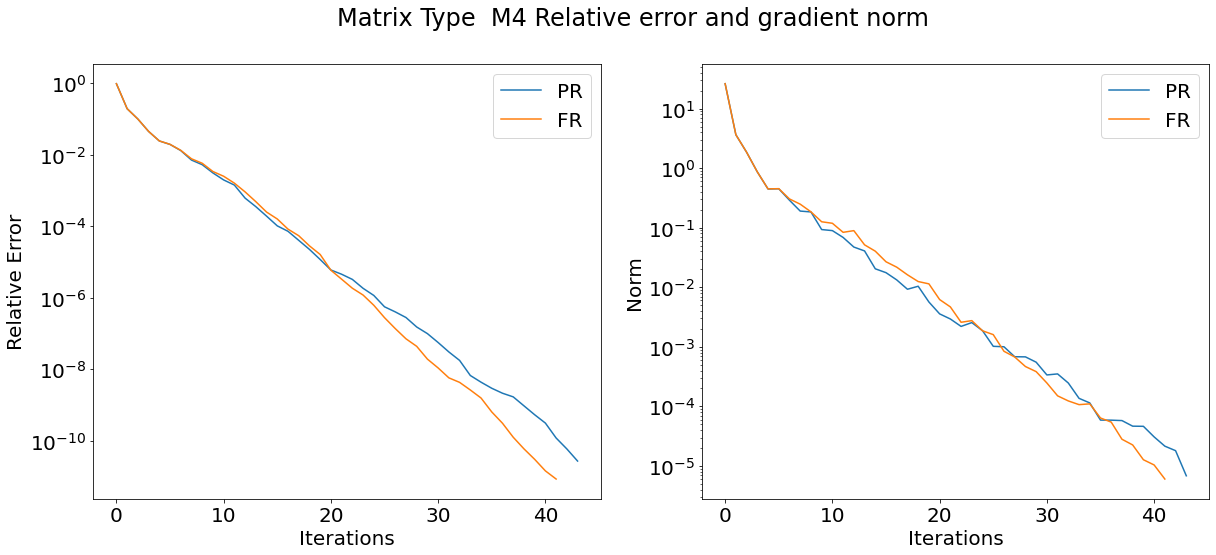

In [159]:
make_plot(gradientsCG_PR,gradientsCG_HS, gradientsCG_FR,
              errorsCG_PR, errorsCG_HS, errorsCG_FR,
              type = 'M4', experiment_name='CG-M4')

# Experiments on Matrix M5

In [76]:
errorsCG_PR = []
gradientsCG_PR = []
errorsCG_FR = []
gradientsCG_FR = []
errorsCG_HS = []
gradientsCG_HS = []

In [77]:
f = nf.normFunction(M5)

In [78]:
initial_vector = f.init_x()

In [79]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='PR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [80]:
norm = la.norm(M5, ord=2) ** 2

PR beta

In [81]:
normsCG_PR = np.array(normsCG)
gradientsCG_PR.insert(0,np.array(gradientCG))
size1 = normsCG_PR.size

In [82]:
normvec = np.ones(size1) * norm
errorsCG_PR.insert(0, (abs(normsCG_PR - normvec) / abs(normvec)))

HS beta

In [83]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='HS', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [84]:
normsCG_HS = np.array(normsCG)
gradientsCG_HS.insert(0,np.array(gradientCG))
size1 = normsCG_HS.size

In [85]:
normvec = np.ones(size1) * norm
errorsCG_HS.insert(0, (abs(normsCG_HS - normvec) / abs(normvec)))

FR beta

In [86]:
optimizerCG = CG.conjugateGradient(f, 1e-5, 500, method='FR', x=initial_vector, verbose = False)
gradientCG, normsCG = optimizerCG.ConjugateGradient()

In [87]:
normsCG_FR = np.array(normsCG)
gradientsCG_FR.insert(0,np.array(gradientCG))
size1 = normsCG_FR.size

In [88]:
normvec = np.ones(size1) * norm
errorsCG_FR.insert(0, (abs(normsCG_FR - normvec) / abs(normvec)))

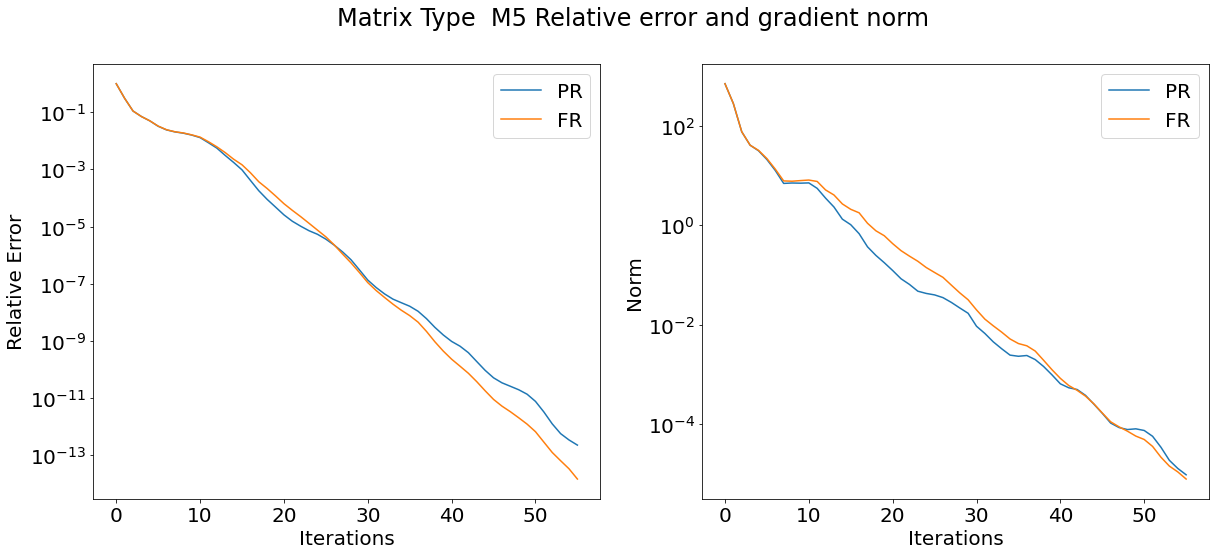

In [89]:
make_plot(gradientsCG_PR,gradientsCG_HS, gradientsCG_FR,
              errorsCG_PR, errorsCG_HS, errorsCG_FR,
              type = 'M5', experiment_name='CG-M5')